In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../..')
from viz.shot_xg import plot_shot_xg
from viz.dribbles_heatmap import plot_dribbles_heatmap
from mplsoccer import Pitch
from PIL import Image

# Visual config
BACKGROUND_COLOR = '#313332'
PITCH_COLOR = '#313332'

# Create output directory
os.makedirs('./diomande_viz', exist_ok=True)

print("Setup complete")

Setup complete


In [2]:
# Configuration
PLAYER_NAME = 'Yan Diomande'  # Sin acento (como está en CSV)
TEAM_NAME = 'RB Leipzig'
COMPETITION = 'Bundesliga'
SEASON = '2025-26'
MATCH_COUNT = 15
FACE_PATH = '../caras/diomande.png'

# CSV paths
SHOTS_CSV = './diomande_shots.csv'
EVENTS_CSV = './diomande_events.csv'
TAKEONS_CSV = './diomande_takeons.csv'
CARRIES_CSV = './diomande_carries.csv'

print(f"Player: {PLAYER_NAME}")
print(f"Team: {TEAM_NAME}")
print(f"Matches: {MATCH_COUNT}")

Player: Yan Diomande
Team: RB Leipzig
Matches: 15


Generating Shot Map...
✓ Shot Map saved


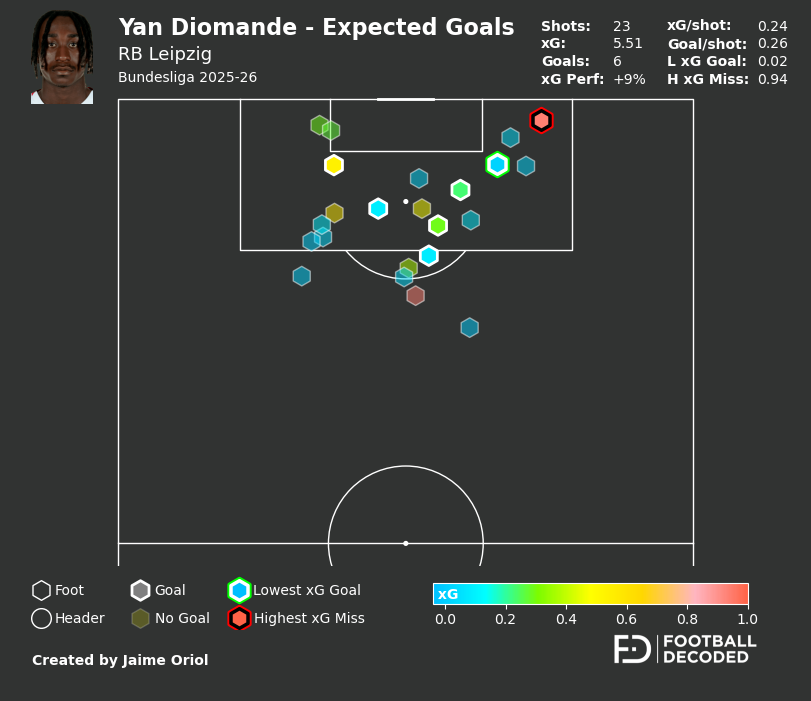

In [3]:
# VIZ 1: SHOT MAP (using viz/shot_xg.py module)
print("Generating Shot Map...")

fig1 = plot_shot_xg(
    csv_path=SHOTS_CSV,
    filter_by=PLAYER_NAME,
    logo_path=FACE_PATH,
    title_text=f"{PLAYER_NAME} - Expected Goals",
    subtitle_text=TEAM_NAME,
    subsubtitle_text=f"{COMPETITION} {SEASON}"
)

if fig1:
    fig1.savefig('./diomande_viz/01_shot_map.png', dpi=300, bbox_inches='tight', facecolor=BACKGROUND_COLOR)
    print("✓ Shot Map saved")
    plt.show()
else:
    print("✗ Error generating shot map")

Generating Touch Heatmap...
Total touches with coordinates: 837
✓ Touch Heatmap saved


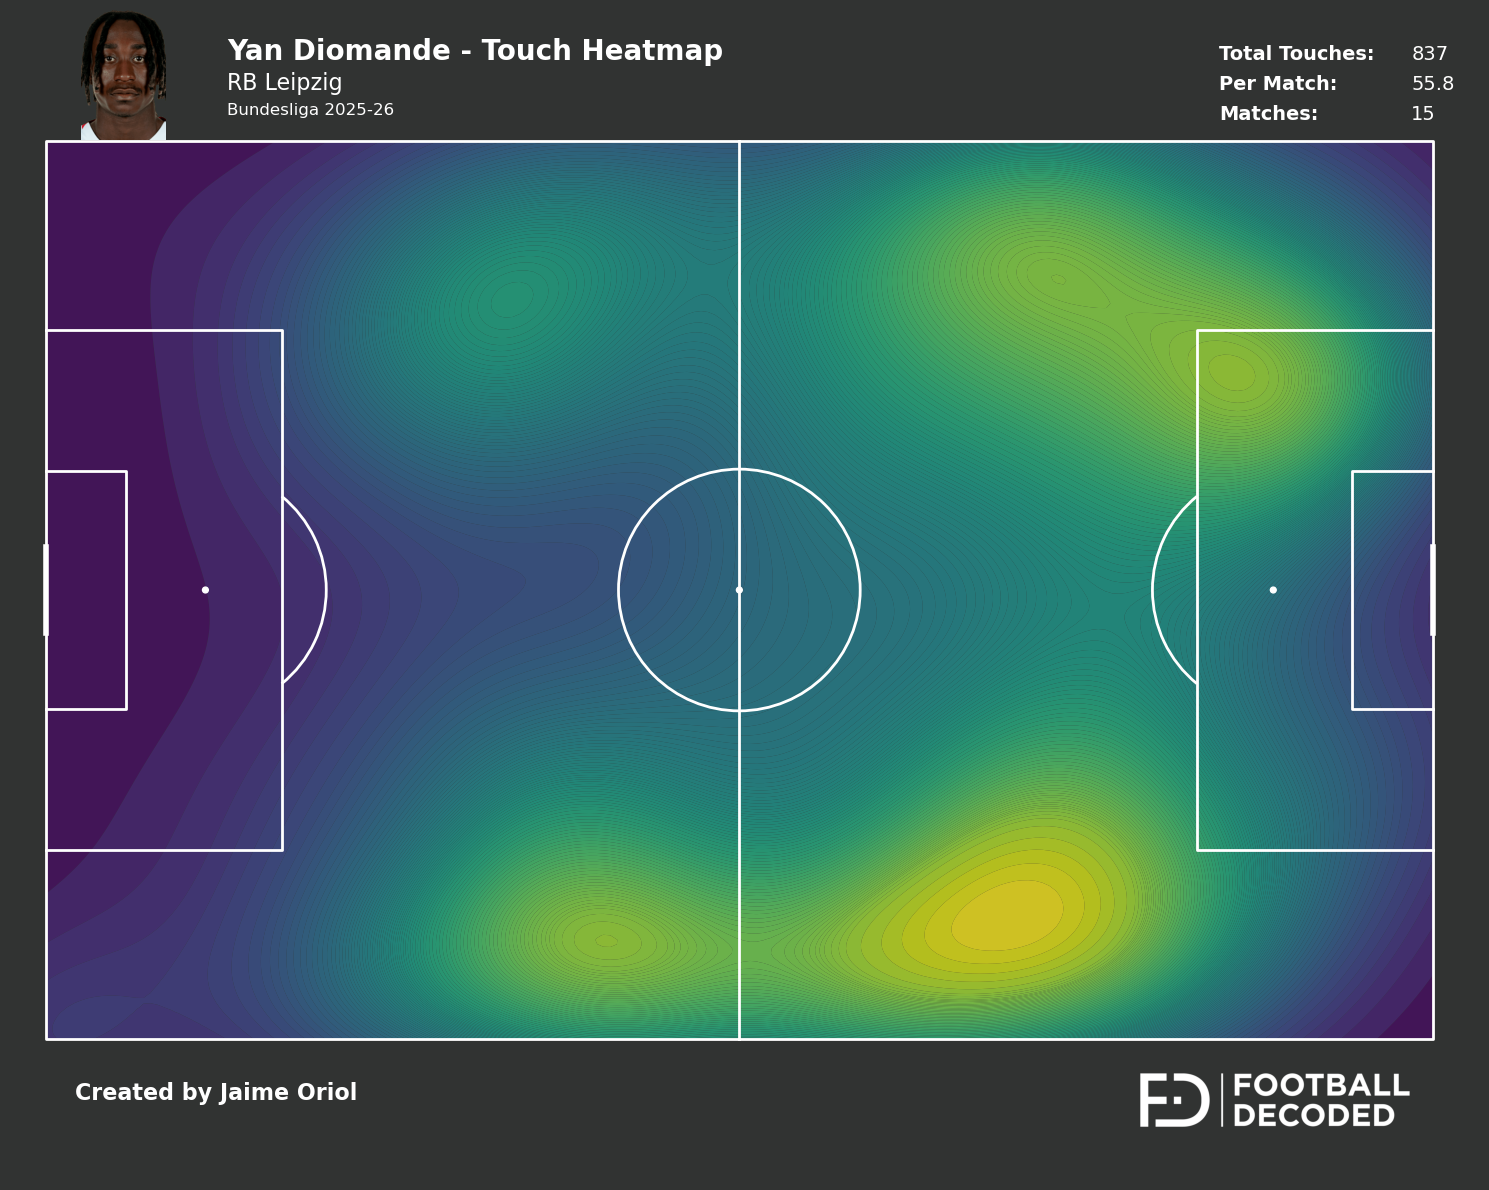

In [4]:
# VIZ 2: TOUCH HEATMAP (new code, layout like dribbles_heatmap/Smit)
print("Generating Touch Heatmap...")

# Load all events
events_df = pd.read_csv(EVENTS_CSV)

# Filter valid coordinates
events_valid = events_df[
    events_df['x'].notna() & 
    events_df['y'].notna()
].copy()

print(f"Total touches with coordinates: {len(events_valid)}")

# Setup pitch
font = 'DejaVu Sans'
pitch = Pitch(
    pitch_color=PITCH_COLOR,
    line_color='white',
    linewidth=2,
    pitch_type='opta'
)

fig, ax = pitch.draw(figsize=(16, 10))
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# KDE HEATMAP
if len(events_valid) > 0:
    pitch.kdeplot(
        events_valid['x'], events_valid['y'],
        fill=True,
        levels=100,
        shade_lowest=True,
        cmap='viridis',
        cut=4,
        alpha=0.8,
        antialiased=True,
        zorder=0,
        ax=ax
    )

# TITLES
fig.text(0.18, 1.03, f"{PLAYER_NAME} - Touch Heatmap", fontweight="bold", fontsize=20, color='w', fontfamily=font)
fig.text(0.18, 1.0, TEAM_NAME, fontweight="regular", fontsize=16, color='w', fontfamily=font)
fig.text(0.18, 0.975, f"{COMPETITION} {SEASON}", fontweight="regular", fontsize=12, color='w', fontfamily=font)

# STATS
total_touches = len(events_valid)
touches_per_match = total_touches / MATCH_COUNT if MATCH_COUNT > 0 else 0

fig.text(0.8, 1.03, "Total Touches:", fontweight="bold", fontsize=14, color='w', fontfamily=font)
fig.text(0.8, 1.0, "Per Match:", fontweight="bold", fontsize=14, color='w', fontfamily=font)
fig.text(0.8, 0.97, "Matches:", fontweight="bold", fontsize=14, color='w', fontfamily=font)

fig.text(0.92, 1.03, f"{total_touches}", fontweight="regular", fontsize=14, color='w', fontfamily=font)
fig.text(0.92, 1.0, f"{touches_per_match:.1f}", fontweight="regular", fontsize=14, color='w', fontfamily=font)
fig.text(0.92, 0.97, f"{MATCH_COUNT}", fontweight="regular", fontsize=14, color='w', fontfamily=font)

# FACE
if os.path.exists(FACE_PATH):
    try:
        face_img = Image.open(FACE_PATH)
        face_ax = fig.add_axes([0.05, 0.95, 0.13, 0.13])
        face_ax.imshow(face_img)
        face_ax.axis('off')
    except:
        pass

# FOOTER
fig.text(0.085, -0.01, "Created by Jaime Oriol", fontweight='bold', fontsize=16, color="white", fontfamily=font)

# LOGO
logo_path = '../logo/Logo-blanco.png'
if os.path.exists(logo_path):
    try:
        logo = Image.open(logo_path)
        logo_ax = fig.add_axes([0.675, -0.09, 0.32, 0.16])
        logo_ax.imshow(logo)
        logo_ax.axis('off')
    except:
        pass

# SAVE
fig.savefig('./diomande_viz/02_touch_heatmap.png', dpi=300, bbox_inches='tight', facecolor=BACKGROUND_COLOR)
print("✓ Touch Heatmap saved")
plt.show()

Generating Dribbles Heatmap...


✓ Dribbles Heatmap saved


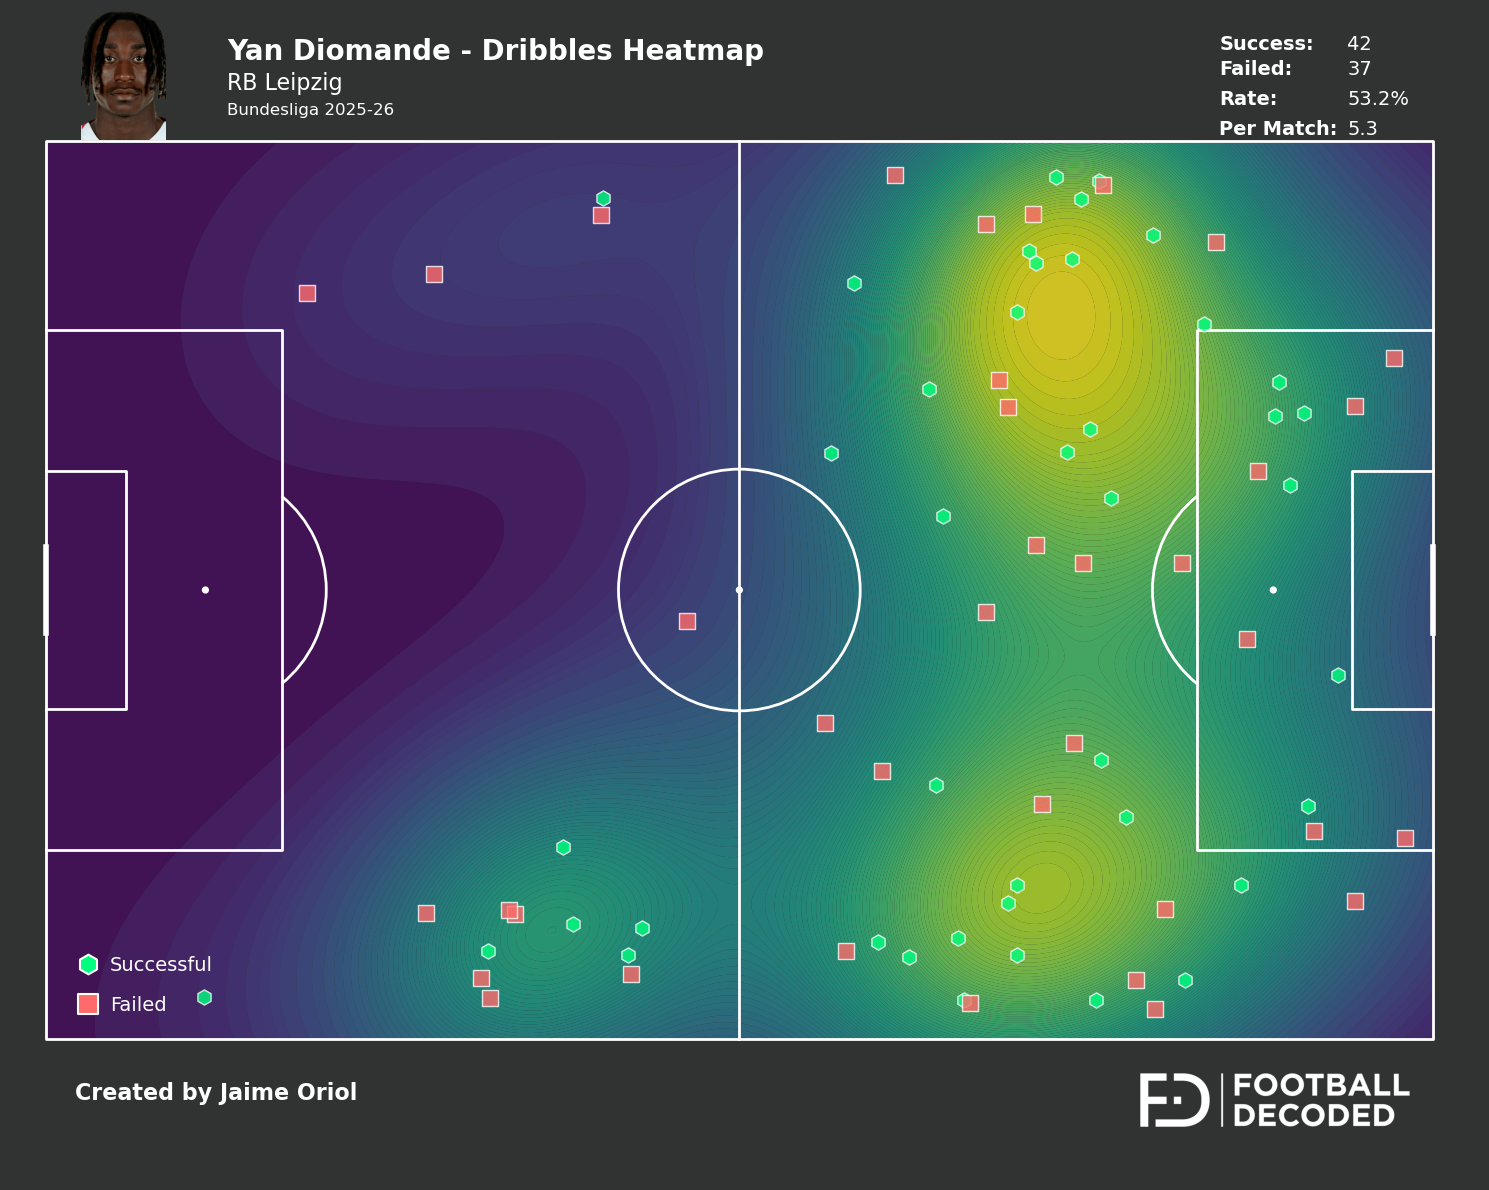

In [5]:
# VIZ 3: DRIBBLES HEATMAP (using viz/dribbles_heatmap.py module)
print("Generating Dribbles Heatmap...")

fig3 = plot_dribbles_heatmap(
    csv_path=TAKEONS_CSV,
    player_name=PLAYER_NAME,
    face_path=FACE_PATH,
    team_name=TEAM_NAME,
    competition=COMPETITION,
    season=SEASON,
    match_count=MATCH_COUNT,
    save_path='./diomande_viz/03_dribbles_heatmap.png'
)

if fig3:
    print("✓ Dribbles Heatmap saved")
    plt.show()
else:
    print("✗ Error generating dribbles heatmap")

Generating Carries Visualization...
Total carries: 101
✓ Carries Visualization saved


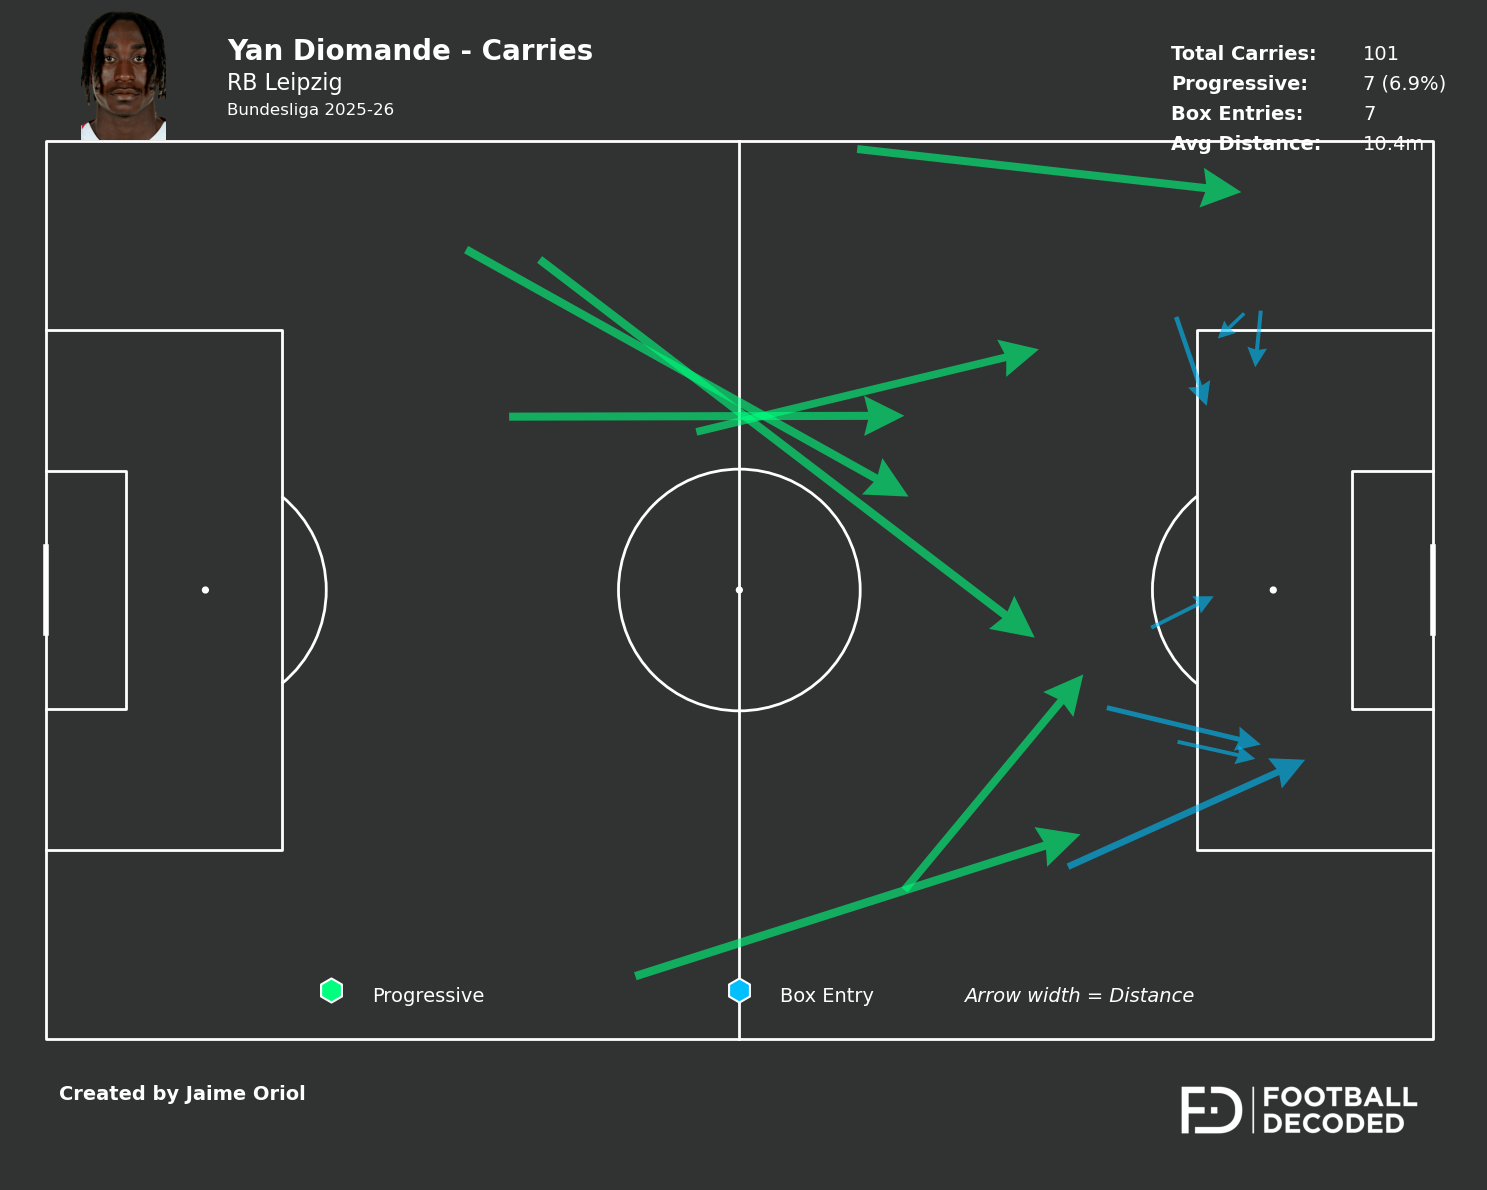


=== CARRIES SUMMARY ===
Total: 101
Progressive: 7 (6.9%)
Box Entries: 7
Average distance: 10.4m


In [6]:
# VIZ 4: CARRIES ARROWS (new code, layout like assist_passes.py)
print("Generating Carries Visualization...")

# Load carries data
carries_df = pd.read_csv(CARRIES_CSV)

# Filter valid coordinates
carries_valid = carries_df[
    carries_df['x'].notna() & 
    carries_df['y'].notna() &
    carries_df['end_x'].notna() & 
    carries_df['end_y'].notna()
].copy()

print(f"Total carries: {len(carries_valid)}")

# Calculate carry distance
carries_valid['distance'] = np.sqrt(
    (carries_valid['end_x'] - carries_valid['x'])**2 +
    (carries_valid['end_y'] - carries_valid['y'])**2
)

# Categorize carries
carries_valid['carry_type'] = 'Normal'
if 'is_progressive' in carries_valid.columns:
    carries_valid.loc[carries_valid['is_progressive'] == True, 'carry_type'] = 'Progressive'
if 'is_box_entry' in carries_valid.columns:
    carries_valid.loc[carries_valid['is_box_entry'] == True, 'carry_type'] = 'Box Entry'

# Setup pitch
font = 'DejaVu Sans'
pitch = Pitch(
    pitch_color=PITCH_COLOR,
    line_color='white',
    linewidth=2,
    pitch_type='opta'
)

fig, ax = pitch.draw(figsize=(16, 10))
fig.set_facecolor(BACKGROUND_COLOR)
ax.set_facecolor(BACKGROUND_COLOR)

# Color scheme
carry_colors = {
    'Progressive': '#00FF7F',
    'Box Entry': '#00BFFF'
}

# Plot ONLY Progressive and Box Entry carries
for carry_type in ['Progressive', 'Box Entry']:
    type_carries = carries_valid[carries_valid['carry_type'] == carry_type]
    
    if len(type_carries) > 0:
        for _, carry in type_carries.iterrows():
            # Arrow width scaled by distance (2-6)
            width = 2 + (min(carry['distance'] / 30, 1) * 4)
            
            pitch.arrows(
                carry['x'], carry['y'],
                carry['end_x'], carry['end_y'],
                color=carry_colors[carry_type],
                alpha=0.6,
                width=width,
                headwidth=5,
                headlength=5,
                zorder=2,
                ax=ax
            )

# LEGEND
legend_ax = fig.add_axes([0.075, 0.065, 0.85, 0.07])
legend_ax.axis("off")
legend_ax.set_xlim([0, 10])
legend_ax.set_ylim([0, 1])

# Carry types (only progressive and box entry)
legend_ax.scatter(2, 0.5, marker='h', s=300, c='#00FF7F', edgecolors='w', lw=1.5)
legend_ax.text(2.3, 0.4, "Progressive", color="w", fontfamily=font, fontsize=14, va='center')

legend_ax.scatter(5, 0.5, marker='h', s=300, c='#00BFFF', edgecolors='w', lw=1.5)
legend_ax.text(5.3, 0.4, "Box Entry", color="w", fontfamily=font, fontsize=14, va='center')

# Arrow width note
legend_ax.text(7.5, 0.4, "Arrow width = Distance", color="w", fontfamily=font, 
              fontsize=14, ha='center', va='center', style='italic')

# TITLES
fig.text(0.18, 1.03, f"{PLAYER_NAME} - Carries", fontweight="bold", fontsize=20, color='w', fontfamily=font)
fig.text(0.18, 1.0, TEAM_NAME, fontweight="regular", fontsize=16, color='w', fontfamily=font)
fig.text(0.18, 0.975, f"{COMPETITION} {SEASON}", fontweight="regular", fontsize=12, color='w', fontfamily=font)

# STATS (calculadas sobre TODOS los carries)
total_carries = len(carries_valid)
progressive_count = (carries_valid['carry_type'] == 'Progressive').sum()
box_entry_count = (carries_valid['carry_type'] == 'Box Entry').sum()
avg_distance = carries_valid['distance'].mean()
prog_pct = (progressive_count / total_carries * 100) if total_carries > 0 else 0

fig.text(0.77, 1.03, "Total Carries:", fontweight="bold", fontsize=14, color='w', fontfamily=font)
fig.text(0.77, 1.00, "Progressive:", fontweight="bold", fontsize=14, color='w', fontfamily=font)
fig.text(0.77, 0.97, "Box Entries:", fontweight="bold", fontsize=14, color='w', fontfamily=font)
fig.text(0.77, 0.94, "Avg Distance:", fontweight="bold", fontsize=14, color='w', fontfamily=font)

fig.text(0.89, 1.03, f"{total_carries}", fontweight="regular", fontsize=14, color='w', fontfamily=font)
fig.text(0.89, 1.00, f"{progressive_count} ({prog_pct:.1f}%)", fontweight="regular", fontsize=14, color='w', fontfamily=font)
fig.text(0.89, 0.97, f"{box_entry_count}", fontweight="regular", fontsize=14, color='w', fontfamily=font)
fig.text(0.89, 0.94, f"{avg_distance:.1f}m", fontweight="regular", fontsize=14, color='w', fontfamily=font)

# FACE
if os.path.exists(FACE_PATH):
    try:
        face_img = Image.open(FACE_PATH)
        face_ax = fig.add_axes([0.05, 0.95, 0.13, 0.13])
        face_ax.imshow(face_img)
        face_ax.axis('off')
    except:
        pass

# FOOTER
fig.text(0.075, -0.01, "Created by Jaime Oriol", fontweight='bold', fontsize=14, color="white", fontfamily=font)

# LOGO
logo_path = '../logo/Logo-blanco.png'
if os.path.exists(logo_path):
    try:
        logo = Image.open(logo_path)
        logo_ax = fig.add_axes([0.7, -0.09, 0.3, 0.14])
        logo_ax.imshow(logo)
        logo_ax.axis('off')
    except:
        pass

# SAVE
fig.savefig('./diomande_viz/04_carries.png', dpi=300, bbox_inches='tight', facecolor=BACKGROUND_COLOR)
print("✓ Carries Visualization saved")
plt.show()

# Summary stats
print(f"\n=== CARRIES SUMMARY ===")
print(f"Total: {total_carries}")
print(f"Progressive: {progressive_count} ({prog_pct:.1f}%)")
print(f"Box Entries: {box_entry_count}")
print(f"Average distance: {avg_distance:.1f}m")

In [7]:
print("\n" + "="*60)
print("ALL VISUALIZATIONS COMPLETED")
print("="*60)
print(f"\nPlayer: {PLAYER_NAME}")
print(f"Team: {TEAM_NAME}")
print(f"Competition: {COMPETITION} {SEASON}")
print(f"Matches analyzed: {MATCH_COUNT}")
print(f"\nOutput directory: ./diomande_viz/")
print("\nFiles generated:")
print("  1. 01_shot_map.png")
print("  2. 02_touch_heatmap.png")
print("  3. 03_dribbles_heatmap.png")
print("  4. 04_carries.png")


ALL VISUALIZATIONS COMPLETED

Player: Yan Diomande
Team: RB Leipzig
Competition: Bundesliga 2025-26
Matches analyzed: 15

Output directory: ./diomande_viz/

Files generated:
  1. 01_shot_map.png
  2. 02_touch_heatmap.png
  3. 03_dribbles_heatmap.png
  4. 04_carries.png
